# HEART DISEASE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('heart.csv')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [35]:
print('NUMBER OF ROWS : ',df.shape[0])
print('NUMBER OF COLUMNS : ',df.shape[1])

NUMBER OF ROWS :  1025
NUMBER OF COLUMNS :  14


In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
#checking for duplicate data , if present drop them
dup = df.duplicated().any()
print(dup)

True


In [38]:
#if True? then data contains duplicate values now drop them
df = df.drop_duplicates()#this method removes all the duplicate data

In [39]:
df.shape#723 rows are removed

(302, 14)

In [40]:
df.describe()#overall statistics of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
#To find people having chances of heart attack or not
#target column contains '0' or '1' indicating '0' = less chance of heart attack, '1' = more chance of heart attack
print(df['target'].value_counts())#this method returns the unique values


1    164
0    138
Name: target, dtype: int64


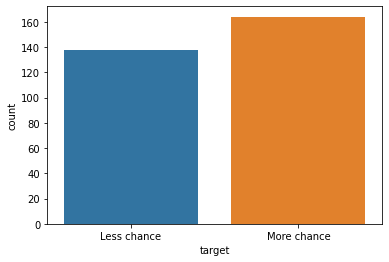

In [65]:
#to suppress warnings
import warnings
warnings.filterwarnings('ignore')
#plotting a graph of the above result
sns.countplot(data['target'])
plt.xticks([0,1],['Less chance','More chance'])
plt.show()

# CORRELATION MATRIX

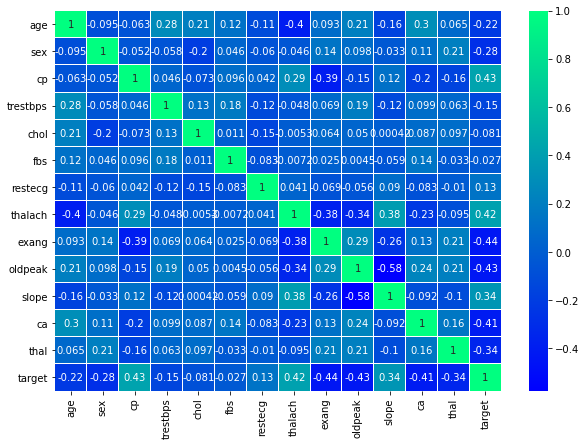

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),linewidth = .01,annot = True,cmap = 'winter')
plt.show()

# TRAIN TEST SPLITTING 

In [68]:
from sklearn.model_selection import train_test_split
predictors = df.drop('target',axis=1)
target = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print('X_Train = ',X_train.shape)
print('X_Test = ',X_test.shape)
print('Y_Train = ',Y_train.shape)
print('Y_Test = ',Y_test.shape)

X_Train =  (241, 13)
X_Test =  (61, 13)
Y_Train =  (241,)
Y_Test =  (61,)


# MODEL FITTING

In [70]:
from sklearn.metrics import accuracy_score

# LOGISTIC REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
score = round(accuracy_score(Y_pred,Y_test)*100,2)
print('Accuracy score using Logistic Regression is : '+str(score)+'%')

Accuracy score using Logistic Regression is : 83.61%


# PICKLE FILE CREATION

In [80]:
import pickle
#pickle is used for serialization = data to one specific model which is ready to use(DUMP)
#Deserialization = for loading that particular model(LOAD)
with open('analysed','wb') as files:
    pickle.dump(lr,files)#writing of file
    
#loading file
target = ['Less chance of heart attack','More chance of heart attack']
new = pickle.load(open('analysed','rb'))
y_pred = new.predict([[59,1,1,140,221,0,1,164,1,0.0,2,0,2]])
y_pred = target[y_pred[0]]
y_pred

'More chance of heart attack'

In [81]:
cleaned=pd.DataFrame(df)
cleaned.to_csv('cleaned.csv')


In [82]:
cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
